# Data Analysing

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
#We are reading the CSV file using Pandas
df = pd.read_csv("hyd_cities2")

In [41]:
df

,Type,BHK,sft,Costpersft,Prices,construction_status,Location,seller_info,Handover,seller
0,Apartment,3,1535,4900,7521000,Under Construction,Ameenpur,Lalitha Construction and Developers,Jan 2023,BUILDER
1,Villa,3,1575,8275,8400000,Under Construction,Harshaguda,Nest Makers,Sep 2024,BUILDER
2,Apartment,3,2548,7810,19900000,Under Construction,Serilingampally,Candeur Developers And Builders,Dec 2025,BUILDER
3,Apartment,3,1775,5199,9228000,Under Construction,Kollur,GHR Infra,Nov 2025,BUILDER
4,Apartment,3,1835,6500,11900000,Under Construction,Nizampet,Vazhraa Nirmaan Pvt Ltd,Apr 2023,BUILDER
...,...,...,...,...,...,...,...,...,...,...
1003,Independent,3,1575,7222,8400000,Ready to move,Madhapur,Sahara Real Estate Consultants,6 years old,AGENT
1004,Apartment,3,1670,10000,16700000,Ready to move,Madhapur,Sahara Real Estate Consultants,6 years old,AGENT
1005,Apartment,3,1550,10004,15500000,Ready to move,Madhapur,Sahara Real Estate Consultants,6 years old,AGENT
1006,Apartment,3,1360,6617,9000000,Ready to move,Madhapur,Sahara Real Estate Consultants,6 years old,AGENT


# EXPLORATORY DATA ANALYSIS

In [367]:
#This is the general description of the numerical columns of the data
df.describe()

,BHK,sft,Costpersft,Prices
count,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,2.761905,1604.122024,5436.398810,9.079532e+06
std,0.603578,479.782510,2219.041771,5.389731e+06
min,1.000000,180.000000,367.000000,4.230000e+05
25%,2.000000,1250.000000,4297.500000,5.403750e+06
50%,3.000000,1575.000000,5600.000000,8.400000e+06
75%,3.000000,1800.500000,6852.500000,1.180000e+07
max,4.000000,3340.000000,10909.000000,2.690000e+07


In [32]:
#This is the general description of the categorical columns of the data
df.describe(include = ['O'])

,Type,construction_status,Location,seller_info,Handover,seller
count,1008,1008,1008,1008,1008,1008
unique,4,4,207,54,58,3
top,Apartment,Under Construction,Kompally,sellerVERIFIED,6 years old,OWNER
freq,681,523,52,584,239,584


In [100]:
#By this grouping data we get the clear understanding of the whole data.
#Only in Residential Plot we can find New and Resale construction_status
#Villa sft's ranges between 1600 to 2300 and prices are between 84lkhs to 1.6Crores
#In the similar way, we get an idea of whole data
df.groupby(["Type","construction_status","seller"])["BHK","sft","Prices"].median()

BHK     sft      Prices
Type             construction_status seller                          
Apartment        Ready to move       AGENT    2.0  1220.0   6850000.0
                                     BUILDER  2.5  1481.5   9288500.0
                                     OWNER    2.0  1250.5   6937500.0
                 Under Construction  AGENT    3.0  1562.5   8400000.0
                                     BUILDER  3.0  1730.0  10600000.0
                                     OWNER    2.0  1261.0   6086000.0
Independent      Ready to move       AGENT    3.0  1575.0   8400000.0
                                     OWNER    3.0  1575.0   8450000.0
                 Under Construction  AGENT    4.0  1575.0  10450000.0
                                     OWNER    2.0  1350.0   8500000.0
Residential Plot New                 AGENT    3.0  1732.5   2812500.0
                 Resale              OWNER    3.0  1552.5   2725000.0
Villa            Ready to move       AGENT    3.0  1685.0  10819000.0
                                     BUILDER  4.0  2300.0  16300000.0
                                     OWNER    4.0  1575.0   8400000.0
                 Under Construction  AGENT    4.0  2070.0  12500000.0
                                     BUILDER  3.0  1575.0   8400000.0
                                     OWNER    3.0  2000.0  13050000.0

- Here we are trying to find the location which has higher prices and locations which has lower prices in hyderabad
- For that we are sorting the data into ascending order depending on the prices
- Then take top 100 rows of data and plot the graph to know which location is more repeating i.e which location has the           highest prices
- Then take last 100 rows of data and plot the graph to know which location is more repeating i.e which location has the           lowest prices

In [109]:
df.sort_values(["Prices"],ascending = False)

,Type,BHK,sft,Costpersft,Prices,construction_status,Location,seller_info,Handover,seller
434,Apartment,3,3030,8900,26900000,Under Construction,Hitech City,Vasavi Group,Nov 2027,BUILDER
489,Villa,4,1575,7500,26900000,Under Construction,Gundlapochampally,Ganesh,Nov 2024,AGENT
655,Villa,4,1800,5600,26800000,Ready to move,Bachupally,sellerVERIFIED,6 years old,OWNER
430,Apartment,3,3005,8900,26700000,Under Construction,Hitech City,Vasavi Group,Nov 2027,BUILDER
435,Apartment,3,2980,8900,26500000,Under Construction,Hitech City,Vasavi Group,Nov 2027,BUILDER
...,...,...,...,...,...,...,...,...,...,...
921,Residential Plot,3,1350,611,825000,Resale,Yadagirigutta,sellerVERIFIED,4 years old,OWNER
538,Residential Plot,3,1323,555,735000,Resale,Alair,sellerVERIFIED,4 years old,OWNER
509,Residential Plot,3,1323,551,730000,Resale,Sadashivpet,sellerVERIFIED,4 years old,OWNER
411,Residential Plot,3,1089,550,600000,Resale,Cherlapalli,sellerVERIFIED,4 years old,OWNER


In [110]:
k = df.sort_values(["Prices"],ascending = False)

In [125]:
k1 = k.head(100)

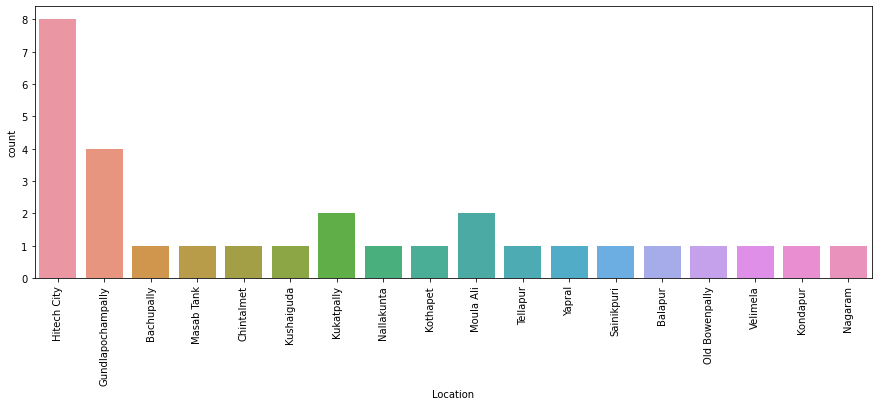

In [119]:
#on higher prices of graph Hitechcity is more repeating hence it has more prices 
plt.figure(figsize=(15, 5))
sns.countplot(x = k1["Location"],data = df)
plt.xticks(rotation = 90)
plt.show()

In [37]:
k2 = k.tail(100)

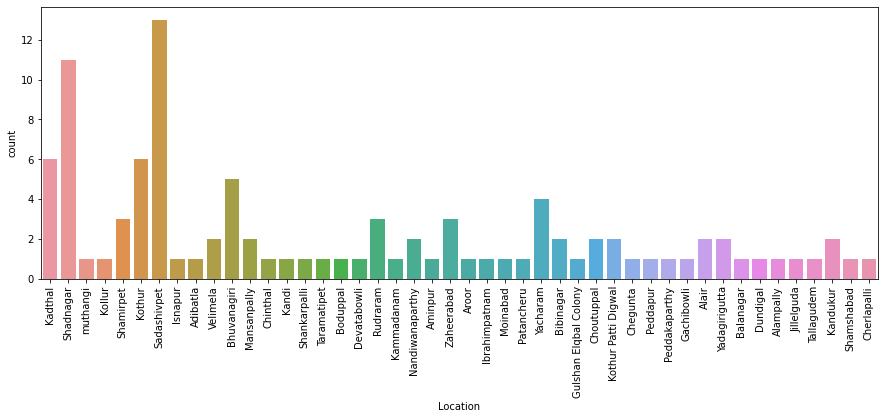

In [39]:
#on lower prices of graph sadashivpet is more repeating hence it has less prices 
plt.figure(figsize=(15, 5))
sns.countplot(x = k2["Location"],data = df)
plt.xticks(rotation = 90)
plt.show()

# Uni Variate Analysis

Apartment           681
Residential Plot    154
Independent         108
Villa                65
Name: Type, dtype: int64 



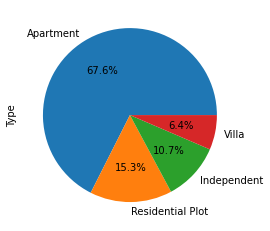

In [69]:
#In Hyderabad Almost 68% of the houses are Apartment Type and Villas are very few
print(df.Type.value_counts(),"\n")
df.Type.value_counts().plot.pie(autopct="%.1f%%")
plt.show()

3    602
2    314
4     86
1      6
Name: BHK, dtype: int64 



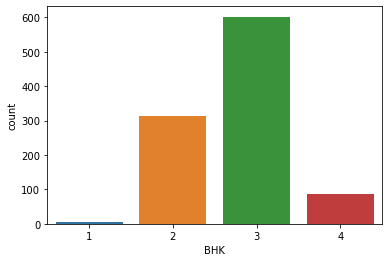

In [70]:
# 3 BHK's are more and 1 BHK's are less in Hyderabad
print(df.BHK.value_counts(),"\n")
sns.countplot(df.BHK)
plt.show()

Under Construction    523
Ready to move         331
Resale                142
New                    12
Name: construction_status, dtype: int64


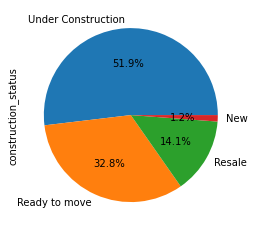

In [72]:
#By this, Most of the houses construction_status is : Under Construction and the next are Ready to move
print(df.construction_status.value_counts())
df.construction_status.value_counts().plot.pie(autopct="%.1f%%")
plt.show()

OWNER      584
BUILDER    279
AGENT      145
Name: seller, dtype: int64 



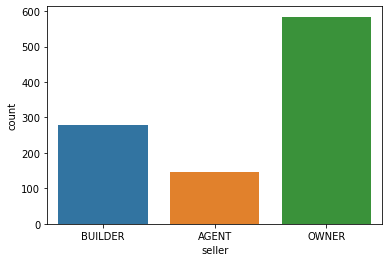

In [71]:
#Through Owner of the house most of the houses are being sold without any mediator 
#where as through agents very few are being sold
print(df.seller.value_counts(),"\n")
sns.countplot(df.seller)
plt.show()

 - This data is useful when we don’t know whom to contact for more house details while buying houses which saves our time.
 - The Agent or Builder who are selling more houses would have more house details.

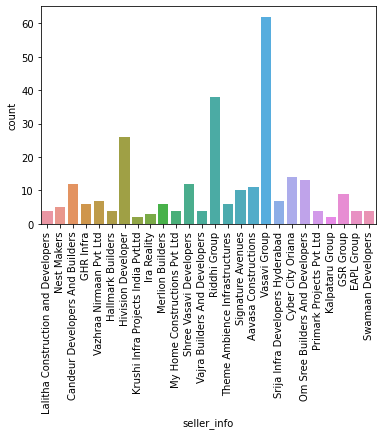

In [98]:
s = df[df["seller"].isin(["BUILDER"])]
#by this vasavi grp Builders are selling more
sns.countplot(x = s.seller_info,data = s)
plt.xticks(rotation = 90)
plt.show()

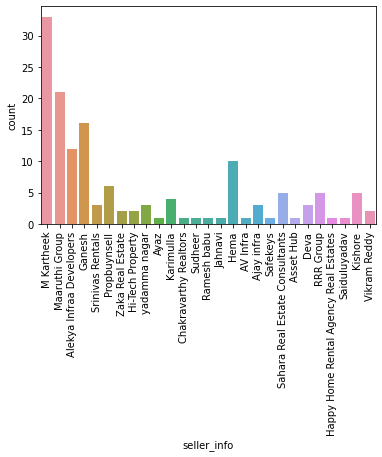

In [99]:
h = df[df["seller"].isin(["AGENT"])]
#by this M Kartheek agent is selling more
sns.countplot(x = h.seller_info,data = h)
plt.xticks(rotation = 90)
plt.show()

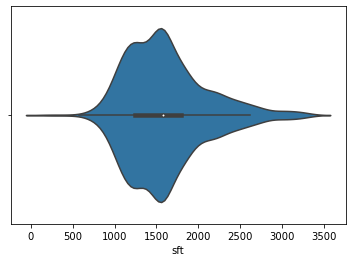

In [77]:
# Most of the houses, sft ranges between 1200 to 2000
sns.violinplot(df.sft)
plt.show()

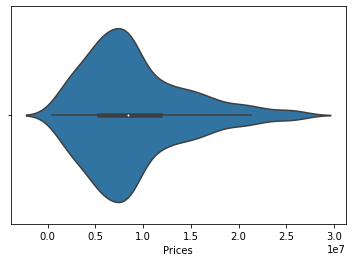

In [78]:
# Most of the houses, Prices ranges between 50lkhs to 1 Crore
sns.violinplot(df.Prices)
plt.show()

# Bi Variate Analysis

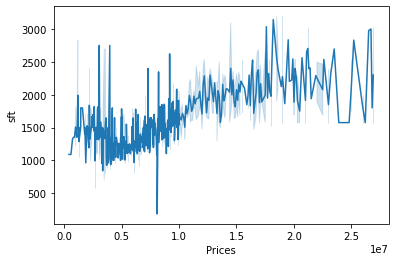

In [80]:
#By this we can say that, When sft of the house increases Prices also increases
sns.lineplot(x = "Prices", y = "sft", data = df)
plt.show()

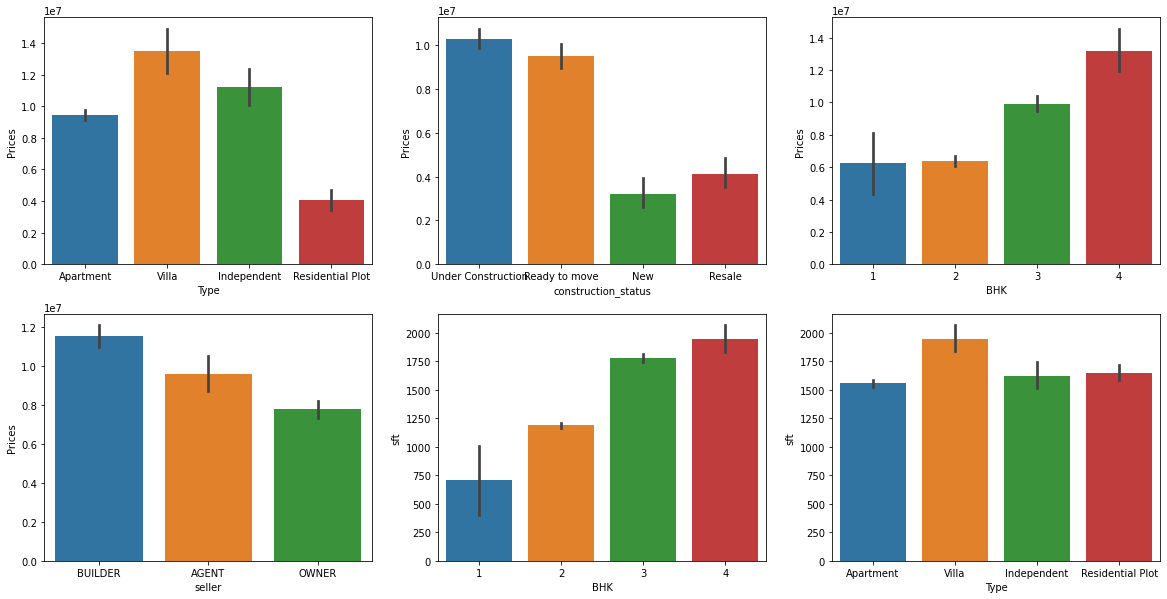

In [106]:
#Prices of Villa and Independent houses are very high when compared to Residential Plot and Apartment
#Prices are high when the house is Under Construction as we have the freedom to design according to our choice 
#Prices of 4 BHK and 3 BHK are very high than 1 BHK and 2 BHK
#Builder is selling houses for more prices than the owner of the houses
#Highest the sft of the house more number of BHK’s can be constructed
#Villas are constructed in more sft spaces compared to Apartments 
fig, axs = plt.subplots(figsize=(20, 10),ncols=3,nrows=2)
sns.barplot(x='Type',y='Prices', data=df,ax=axs[0][0])
sns.barplot(x='construction_status',y='Prices', data=df,ax=axs[0][1])
sns.barplot(x='BHK',y='Prices', data=df,ax=axs[0][2])
sns.barplot(x='seller',y='Prices', data=df,ax=axs[1][0])
sns.barplot(x='BHK',y='sft', data=df,ax=axs[1][1])
sns.barplot(x='Type',y='sft', data=df,ax=axs[1][2])
plt.show()

# Multi Variate Analysis

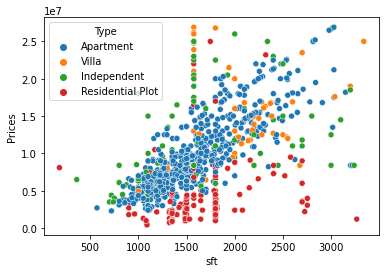

In [82]:
#Most of the houses are Apartment and sft ranges between 800 to 2000 where as Prices are 50lkhs to 1Crore
sns.scatterplot(df["sft"],df["Prices"],hue=df["Type"])
plt.show()

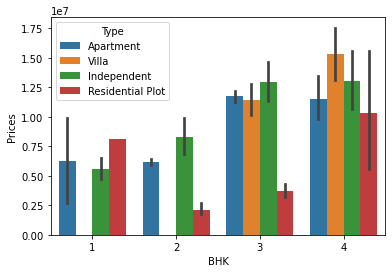

In [101]:
#For Apartment Prices are low and BHK’s are ranging from 1 to 4 
#where as Villas has the highest prices with more number of BHK’s
sns.barplot(x = df["BHK"],y = df["Prices"],hue = df["Type"])
plt.show()

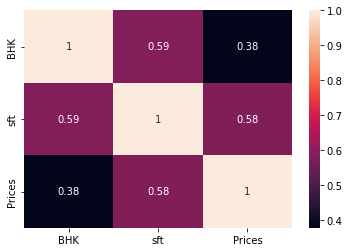

In [155]:
#From heatmap we can say that all the numerical columns have positive correlation.
#When sft’s increases BHK’s and Prices also increases
sns.heatmap(num_df.corr(), annot=True)
plt.show()